### NOTICE:
1. remember that this is only a sample copied form kaggle kernal, [the original scripit is here](https://www.kaggle.com/guyko81/allstate-claims-severity/just-an-easy-solution/comments)
2. having problem with install xgboost packages? [link](https://github.com/dmlc/xgboost/tree/master/python-package)


In [104]:
import xgboost as xgb
from scipy.stats import norm, lognorm, probplot
import matplotlib.mlab as mlab
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [105]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

features = [x for x in train.columns if x not in ['id','loss']]
cat_features = [x for x in train.select_dtypes(include=['object']).columns if x not in ['id','loss']]
num_features = [x for x in train.select_dtypes(exclude=['object']).columns if x not in ['id','loss']]

print('train size is {}, test size is {}'.format(train.shape,test.shape) )

train size is (188318, 132), test size is (125546, 131)


if the loss follows a log-normal distribution

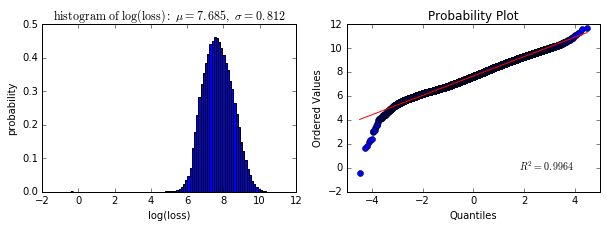

In [106]:
train['log_loss'] = np.log(train['loss']) # https://www.zhihu.com/question/22012482
f,(fig1,fig2) = plt.subplots(1,2,figsize = (10,3))
fig1.hist(np.log(train['loss']),bins=100,normed = 1)
fig1.set_xlabel('log(loss)')
fig1.set_ylabel('probability')
(mu , sigma) = norm.fit(train['log_loss'])
fig1.set_title(r'$\mathrm{histogram\ of\ log(loss):}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))

probplot(np.log(train['loss']),plot=fig2)

plt.show()

In [64]:
# now, to prepare for xgboost, we turn category data from both train&test into numeric 0,1,2,3... and do one-hot
'''
train_test = pd.concat((train[features],test[features]),axis=0).reset_index(drop=1)

for i in range(len(cat_features)):
    train_test[cat_features[i]] = train_test[cat_features[i]].astype('category').cat.codes
'''

"\ntrain_test = pd.concat((train[features],test[features]),axis=0).reset_index(drop=1)\n\nfor i in range(len(cat_features)):\n    train_test[cat_features[i]] = train_test[cat_features[i]].astype('category').cat.codes\n"

In [99]:
train_test = pd.concat((train[features],test[features]),axis=0).reset_index(drop=1)

train_test_cat_encoded =pd.get_dummies(train_test[cat_features])

In [100]:
train_test_cat_encoded.shape

(313864, 1176)

In [101]:
# seperate our data into test & train  again
train_test_encoded = pd.concat((train_test_cat_encoded,train_test[num_features]),axis=1)

train_x = train_test_encoded.iloc[:nrow_train,:]
test_x = train_test_encoded.iloc[nrow_train:,:]

In [102]:
train_x

,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat4_A,cat4_B,cat5_A,cat5_B,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606
5,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.295397,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931
7,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.473767,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416
8,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.281143,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191
9,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.310061,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523


- build up the xgboost model

In [107]:
xgbmat = xgb.DMatrix(train_x,train['log_loss'])

params = {'eta': 0.01, 'seed':0, 'subsample': 0.5, 'colsample_bytree': 0.5, 
             'objective': 'reg:linear', 'max_depth':6, 'min_child_weight':3}

num_rounds = 2000

bst = xgb.train(params,xgbmat,num_rounds)
pred = bst.predict(xgb.DMatrix(test_x))

In [108]:
loss = pd.DataFrame(np.e**pred)
id = test['id']
rslt = pd.DataFrame({'id':test['id'],'loss':np.e**pred})

In [109]:
rslt

,id,loss
0,4,1454.398193
1,6,1898.811279
2,9,9065.073242
3,12,5718.464355
4,15,825.752441
5,17,2247.246338
6,21,2363.466064
7,28,867.265259
8,32,2228.727051
9,43,3058.122070


In [110]:
rslt.to_csv('result3_2000run_encoded4cats.csv',index=0)

- following is a little example using get_dummies to do one hot enc

In [59]:
tst = np.transpose(pd.DataFrame([['A','B','B'],['A','B','C']]))
tst

,0,1
0,A,A
1,B,B
2,B,C


In [60]:
pd.get_dummies(tst)

,0_A,0_B,1_A,1_B,1_C
0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0
